# Библиотеки

In [864]:
import os
import sys
import numpy as np
import collections
from tqdm import tqdm
from random import randint

# A*

## Проба пера

In [865]:
from collections import deque

gr = {'A': ['B', 'E'],
      'B': ['C'],
      'C': ['D'],
      'D': [],
      'E': ['D']}

# gr = {i: [i+1] for i in range(100)}


def bfs(graph, start, finish):
    queue = deque([start])
    visited = {start: None}

    while queue:
        cur_node = queue.popleft()
        if cur_node == finish:
            break
        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            if next_node not in visited:
                queue.append(next_node)
                visited[next_node] = cur_node
    return visited


s = 'A'
g = 'D'

visited = bfs(gr, s, g)

key = True
while key:
    if g != s:
        print(g + ' <-- ' + visited[g])
        g = visited[g]
    else:
        key = False

print(visited)

D <-- E
E <-- A
{'A': None, 'B': 'A', 'E': 'A', 'C': 'B', 'D': 'E'}


In [866]:
from heapq import *
gr = {'A': [(1, 'B'), (2, 'E')],
      'B': [(1, 'C')],
      'C': [(1, 'D')],
      'D': [],
      'E': [(2, 'D')]}


def dijkstra(graph, start, finish):
    queue = []
    heappush(queue, (0, start))
    cost_visited = {start: 0}
    visited = {start: None}

    while queue:
        cur_cost, cur_node = heappop(queue)
        if cur_node == finish:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[cur_node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                print(neigh_node)
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = cur_node
    return visited


res = dijkstra(gr, 'A', 'D')
res

B
E
C
D


{'A': None, 'B': 'A', 'E': 'A', 'C': 'B', 'D': 'C'}

## Алгоритмы

In [867]:
def recover_path(vis, start, goal, path=None):
    '''
    Важно понимать, что это восстановление рекурсивное
    '''
    if path == None:
        path = []
    if start == goal:
        return path[::-1]
#         return ' --> '.join(path[::-1])
    else:
        path.append(vis[goal])
        return recover_path(vis, start, vis[goal], path)


result = recover_path(res, 'A', 'D')
print(result)

['A', 'B', 'C']


In [868]:
def heuristic(a, b):
    #     return 10000
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [869]:
def Astar(graph, start, finish):
    queue = []
    heappush(queue, (0, start))
    cost_visited = {start: 0}
    visited = {start: None}

    while queue:
        cur_cost, cur_node = heappop(queue)
        if cur_node == finish:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[cur_node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                priority = new_cost + heuristic(neigh_node, finish)
                heappush(queue, (priority, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = cur_node
    return visited


res = Astar(gr, 'A', 'D')
result = recover_path(res, 'A', 'D')
print(result)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
graph = {}
n = 15
m = 80
for i in range(n):
    for j in range(m):
        if i == n-1:
            graph[(i, j)] = [(1, (i, j+1))]
        elif j == m-1:
            graph[(i, j)] = [(1, (i+1, j))]
        else:
            graph[(i, j)] = [(1, (i+1, j)), (1, (i, j+1)), (2, (i+1, j+1))]
# print(graph.values())

start = (5, 3)
goal = (10, 65)

vis = Astar(graph, start, goal)
result = recover_path(vis, start, goal)

In [ ]:
for i in range(n):
    for j in range(m):
        if i == start[0] and j == start[1]:
            print('S', end='')
        elif (i, j) in result:
            print('#', end='')
        elif i == goal[0] and j == goal[1]:
            print('F', end='')
        else:
            print('.', end='')
    print('\n', end='')

## Финальное оформление

### Генерация графа

**Задача**

1. Сгенерировать квадратную сетку $N$ на $M$
2. Сделать на ее основе граф с весами до соседних клеток равный $d$

In [870]:
N = 3
M = 3

d = 1

graph = {}
forbidden = []

for i in range(N):
    for j in range(M):
        graph[(i, j)] = []

for i in range(N):
    for j in range(M):
        if (i, j) not in forbidden:
            if i-1 != -1 and j-1 != -1:
                graph[(i, j)].append((d, (i-1, j-1)))
            if i-1 != -1 and 0 <= j < M:
                graph[(i, j)].append((d, (i-1, j)))
            if i-1 != -1 and j+1 != M:
                graph[(i, j)].append((d, (i-1, j+1)))
            if 0 <= i <= N and j+1 != M:
                graph[(i, j)].append((d, (i, j+1)))
            if i+1 != N and j+1 != M:
                graph[(i, j)].append((d, (i+1, j+1)))
            if i+1 != N and 0 <= j < M:
                graph[(i, j)].append((d, (i+1, j)))
            if i+1 != N and j-1 != -1:
                graph[(i, j)].append((d, (i+1, j-1)))
            if 0 <= i < N and j-1 != -1:
                graph[(i, j)].append((d, (i, j-1)))


#         if i != N-1 and i != 0 and j != M-1 and j != 0:
#             graph[(i, j)] = [(d, (i-1, j-1)), (d, (i-1, j)), (d, (i-1, j+1)), (d, (i, j+1)),
#                              (d, (i+1, j+1)), (d, (i+1, j)), (d, (i+1, j-1)), (d, (i, j-1))]
#         elif i == 0 and j == 0:
#             graph[(i,j)] = [(d, (i, j+1)), (d, (i+1,j+1)), (d, (i+1, j))]
#         elif i == 0 and j != 0:
#             graph[(i,j)] = [(d, (i, j+1)), (d, (i+1,j+1)), (d, (i+1, j)),
#                             (d, (i+1, j-1)), (d, (i, j-1))]

for key in graph:
    print(len(graph[key]))

3
5
3
5
8
5
3
5
3


In [871]:
def graph_gen(N=3, M=3, d=1, forbidden=[]):
    graph = {}

    for i in range(N):
        for j in range(M):
            graph[(i, j)] = []

    for i in range(N):
        for j in range(M):
            if (i, j) not in forbidden:
                if i-1 != -1 and j-1 != -1 and (i-1, j-1) not in forbidden:
                    graph[(i, j)].append((d*1.41, (i-1, j-1)))  # 1 - ая ячейка
                if i-1 != -1 and 0 <= j < M and (i-1, j) not in forbidden:
                    graph[(i, j)].append((d, (i-1, j)))        # 2 - ая ячейка
                if i-1 != -1 and j+1 != M and (i-1, j+1) not in forbidden:
                    graph[(i, j)].append((d*1.41, (i-1, j+1)))  # 3 - ая ячейка
                if 0 <= i <= N and j+1 != M and (i, j+1) not in forbidden:
                    graph[(i, j)].append((d, (i, j+1)))        # 4 - ая ячейка
                if i+1 != N and j+1 != M and (i+1, j+1) not in forbidden:
                    graph[(i, j)].append((d*1.41, (i+1, j+1)))  # 5 - ая ячейка
                if i+1 != N and 0 <= j < M and (i+1, j) not in forbidden:
                    graph[(i, j)].append((d, (i+1, j)))        # 6 - ая ячейка
                if i+1 != N and j-1 != -1 and (i+1, j-1) not in forbidden:
                    graph[(i, j)].append((d*1.41, (i+1, j-1)))  # 7 - ая ячейка
                if 0 <= i < N and j-1 != -1 and (i, j-1) not in forbidden:
                    graph[(i, j)].append((d, (i, j-1)))        # 8 - ая ячейка
    return graph

### Поиск по графу и восстановление пути (пока что рекурсивно)

In [872]:
def Astar_rec(graph, start, finish):
    queue = []
    heappush(queue, (0, start))
    cost_visited = {start: 0}
    visited = {start: None}

    while queue:
        cur_cost, cur_node = heappop(queue)
        if cur_node == finish:
            break

        next_nodes = graph[cur_node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[cur_node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                priority = new_cost + heuristic(neigh_node, finish)
                heappush(queue, (priority, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = cur_node

    result = recover_path(visited, start, finish)
    return result

In [873]:
N = 50
M = 50
gr = graph_gen(N, M)
start = (0, 1)
goal = (15, 45)
res = Astar_rec(gr, start, goal)
# result = recover_path(res, start, goal)
print(result)

['A', 'B', 'C']


### Отображение (пока что псевдографикой)

In [874]:
def draw_graph(N, M, result, start, goal, forbidden=[]):
    for i in range(N):
        for j in range(M):
            if (i, j) in forbidden:
                print('X', end='')
            elif i == start[0] and j == start[1]:
                print('S', end='')
            elif (i, j) in result:
                print('#', end='')
            elif i == goal[0] and j == goal[1]:
                print('F', end='')
            else:
                print('.', end='')
        print('\n', end='')

In [875]:
def draw_graph_pathless(N, M, start, goal, forbidden=[]):
    for i in range(N):
        for j in range(M):
            if (i, j) in forbidden:
                print('X', end='')
            elif i == start[0] and j == start[1]:
                print('S', end='')
            elif i == goal[0] and j == goal[1]:
                print('F', end='')
            else:
                print('.', end='')
        print('\n', end='')

### Генерация запретных зон

In [876]:
def forbidden_gen_rectangle(start, goal):
    forbidden = []
    for i in range(start[0], goal[0] + 1):
        for j in range(start[1], goal[1] + 1):
            forbidden.append((i, j))
    return set(forbidden)

In [877]:
def forbidden_random(N, M, k=0):
    forbidden = set()
    for _ in range(k):
        f1 = randint(0, N-1)
        f2 = randint(0, M-1)
        forbidden.add((f1, f2))
    return forbidden

In [878]:
N = 50
M = 50
k = 0
lu_fob = (0, 1)
rb_fob = (23, 99)
test = forbidden_gen_rectangle(lu_fob, rb_fob)
test2 = forbidden_random(N, M, k)
test = test2  # .union(forbidden_random(N, M, k))
gr = graph_gen(N, M, forbidden=test)
start = (0, 0)
goal = (N-1, M-1)
# res = Astar_rec(gr, start, goal)

res = Astar_rec(gr, start, goal)
draw_graph(N, M, res, start, goal, forbidden=test)

S.................................................
.#................................................
..#...............................................
...#..............................................
....#.............................................
.....#............................................
......#...........................................
.......#..........................................
........#.........................................
.........#........................................
..........#.......................................
...........#......................................
............#.....................................
.............#....................................
..............#...................................
...............#..................................
................#.................................
.................#................................
..................#...............................
...................#...........

In [879]:
res = Astar_rec(gr, start, goal)
draw_graph(N, M, res, start, goal, forbidden=test)

S.................................................
.#................................................
..#...............................................
...#..............................................
....#.............................................
.....#............................................
......#...........................................
.......#..........................................
........#.........................................
.........#........................................
..........#.......................................
...........#......................................
............#.....................................
.............#....................................
..............#...................................
...............#..................................
................#.................................
.................#................................
..................#...............................
...................#...........

## Красивые рисунки

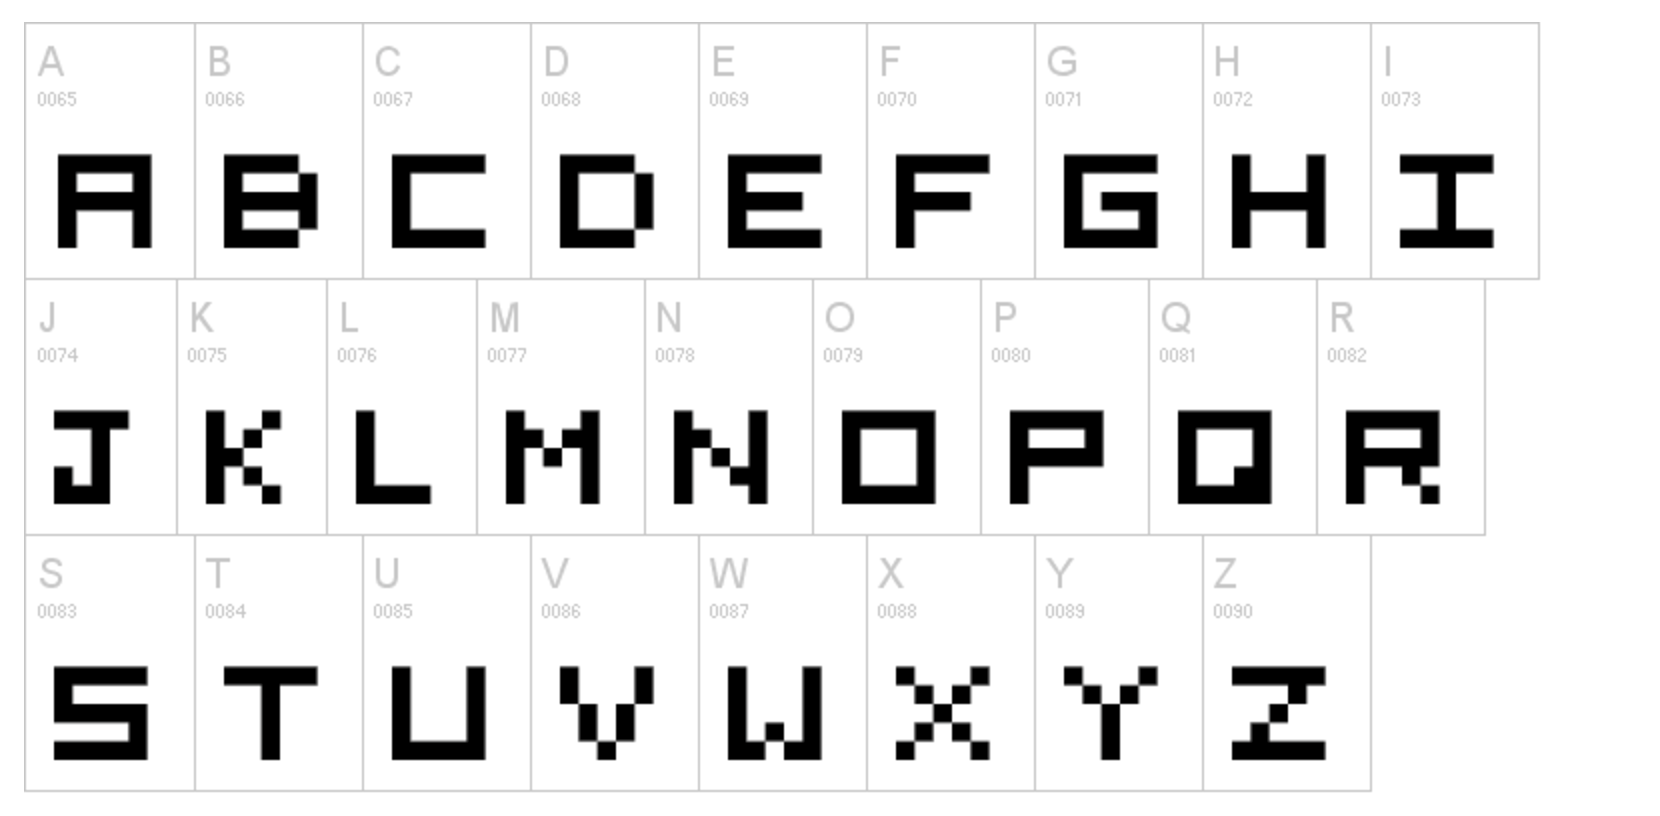

In [880]:
from PIL import Image

In [881]:
ws = np.array([[0, 0, 0, 0, 0, 0, 0],
               [0, 255, 255, 255, 255, 255, 0],
               [0, 255, 0, 0, 0, 0, 0],
               [0, 255, 255, 255, 255, 255, 0],
               [0, 0, 0, 0, 0, 255, 0],
               [0, 255, 255, 255, 255, 255, 0],
               [0, 0, 0, 0, 0, 0, 0]])

wf = np.array([[0, 0, 0, 0, 0, 0, 0],
               [0, 255, 255, 255, 255, 255, 0],
               [0, 255, 0, 0, 0, 0, 0],
               [0, 255, 255, 255, 0, 0, 0],
               [0, 255, 0, 0, 0, 0, 0],
               [0, 255, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0]])

wx = np.array([[0, 0, 0, 0, 0, 0, 0],
               [0, 255, 0, 0, 0, 255, 0],
               [0, 0, 255, 0, 255, 0, 0],
               [0, 0, 0, 255, 0, 0, 0],
               [0, 0, 255, 0, 255, 0, 0],
               [0, 255, 0, 0, 0, 255, 0],
               [0, 0, 0, 0, 0, 0, 0]])

wp = np.array([[0, 0, 0, 0, 0, 0, 0],
               [0, 0, 255, 255, 255, 0, 0],
               [0, 255, 0, 0, 0, 255, 0],
               [0, 255, 0, 0, 0, 255, 0],
               [0, 255, 0, 0, 0, 255, 0],
               [0, 0, 255, 255, 255, 0, 0],
               [0, 0, 0, 0, 0, 0, 0]])

In [884]:
N = 150*1
M = 200*1
k = 300*3
lu_fob = (7, 8)
rb_fob = (122, 178)
test = forbidden_gen_rectangle(lu_fob, rb_fob)
test2 = forbidden_random(N, M, k)
gr = graph_gen(N, M, forbidden=test.union(test2))
start = (0, 0)
goal = (N-1, M-1)
# res = Astar_rec(gr, start, goal)

forbidden = test2.union(test)
res = Astar_rec(gr, start, goal)

coef = 31

if coef != 7:
    wx = np.full((coef, coef), 50)
    ws = np.full((coef, coef), 255)
    wp = np.full((coef, coef), 255)
    wf = np.full((coef, coef), 255)
image = np.ones((N*coef, M*coef))
# Image.fromarray(image).show()
for i in tqdm(range(N)):
    for j in range(M):
        center1 = coef//2 + coef*i
        center2 = coef//2 + coef*j
        if (i, j) in forbidden:
            image[center1-coef//2:center1+coef//2 + 1, center2-coef//2:center2+coef//2 + 1] *= wx
        elif i == start[0] and j == start[1]:
            image[center1-coef//2:center1+coef//2 + 1, center2-coef//2:center2+coef//2 + 1] *= ws
            pass
        elif (i, j) in res:
            image[center1-coef//2:center1+coef//2 + 1, center2-coef//2:center2+coef//2 + 1] *= wp
        elif i == goal[0] and j == goal[1]:
            pass
            image[center1-coef//2:center1+coef//2 + 1, center2-coef//2:center2+coef//2 + 1] *= wf
        else:
            pass
# Image.fromarray(image).show()
Image.fromarray(image).convert('L').save('output.jpg')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 946.26it/s]
